# Test des fonctions de prétraitement d'images (sans TensorFlow)

Ce notebook permet de tester les fonctions du module `preprocess_images.py` modifié pour fonctionner sans TensorFlow.

In [2]:
# Ajouter le répertoire parent au chemin de recherche Python
import sys
import os

# Obtenir le chemin absolu du répertoire parent
notebook_dir = os.path.abspath('')
project_dir = os.path.dirname(notebook_dir)
if project_dir not in sys.path:
    sys.path.append(project_dir)

# Imports standard
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import random

# Imports depuis la nouvelle structure de projet
from src.preprocessing import preprocess_images as preproc
from src.visualization import visualizer as viz

# Configuration pour afficher les images dans le notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('ggplot')

## 1. Configuration des chemins d'accès aux données

In [3]:
# Chemin principal vers le jeu de données
data_dir = r'../data/chest_Xray'

# Chemins vers les sous-répertoires
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

# Chemins vers les catégories
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

# Vérification des chemins
print(f"Train normal directory exists: {os.path.exists(train_normal_dir)}")
print(f"Train pneumonia directory exists: {os.path.exists(train_pneumonia_dir)}")
print(f"Test normal directory exists: {os.path.exists(test_normal_dir)}")
print(f"Test pneumonia directory exists: {os.path.exists(test_pneumonia_dir)}")

Train normal directory exists: True
Train pneumonia directory exists: True
Test normal directory exists: True
Test pneumonia directory exists: True


## 2. Test du chargement et du prétraitement d'une image

In [4]:
# Sélectionner une image aléatoire du dossier d'images normales
normal_images = os.listdir(train_normal_dir)
random_normal_image = random.choice(normal_images)
normal_image_path = os.path.join(train_normal_dir, random_normal_image)

# Sélectionner une image aléatoire du dossier d'images avec pneumonie
pneumonia_images = os.listdir(train_pneumonia_dir)
random_pneumonia_image = random.choice(pneumonia_images)
pneumonia_image_path = os.path.join(train_pneumonia_dir, random_pneumonia_image)

print(f"Image normale sélectionnée: {normal_image_path}")
print(f"Image avec pneumonie sélectionnée: {pneumonia_image_path}")

Image normale sélectionnée: ../data/chest_Xray\train\NORMAL\NORMAL2-IM-1151-0001.jpeg
Image avec pneumonie sélectionnée: ../data/chest_Xray\train\PNEUMONIA\person1349_bacteria_3436.jpeg


### 2.1 Chargement et prétraitement d'une image normale

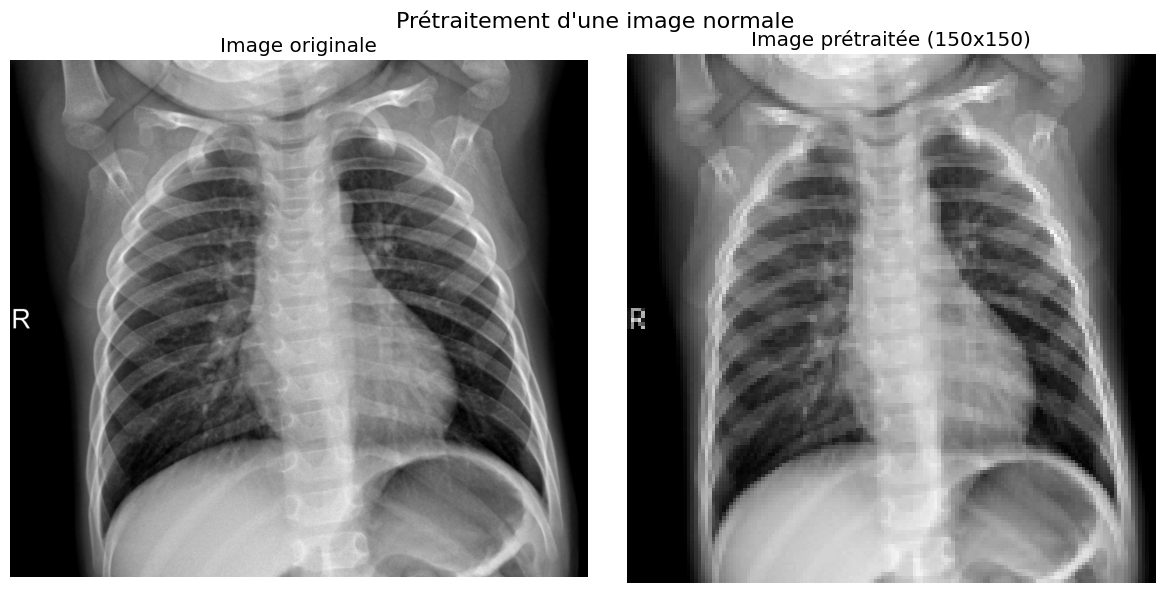

Forme de l'image prétraitée: (150, 150, 1)
Valeur minimale: 0.0
Valeur maximale: 0.9490196078431372
Valeur moyenne: 0.4119


In [5]:
# Charger et prétraiter l'image normale
img_size = (150, 150)
normal_image_processed = preproc.charger_et_pretraiter_image(normal_image_path, img_size)

# Afficher l'image originale et l'image prétraitée
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Image originale
original_img = cv2.imread(normal_image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
ax1.imshow(original_img)
ax1.set_title("Image originale")
ax1.axis('off')

# Image prétraitée
ax2.imshow(np.squeeze(normal_image_processed), cmap='gray')
ax2.set_title(f"Image prétraitée ({img_size[0]}x{img_size[1]})")
ax2.axis('off')

plt.suptitle("Prétraitement d'une image normale", fontsize=16)
plt.tight_layout()
plt.show()

# Afficher la forme et les statistiques de l'image prétraitée
print(f"Forme de l'image prétraitée: {normal_image_processed.shape}")
print(f"Valeur minimale: {normal_image_processed.min()}")
print(f"Valeur maximale: {normal_image_processed.max()}")
print(f"Valeur moyenne: {normal_image_processed.mean():.4f}")

### 2.2 Chargement et prétraitement d'une image avec pneumonie

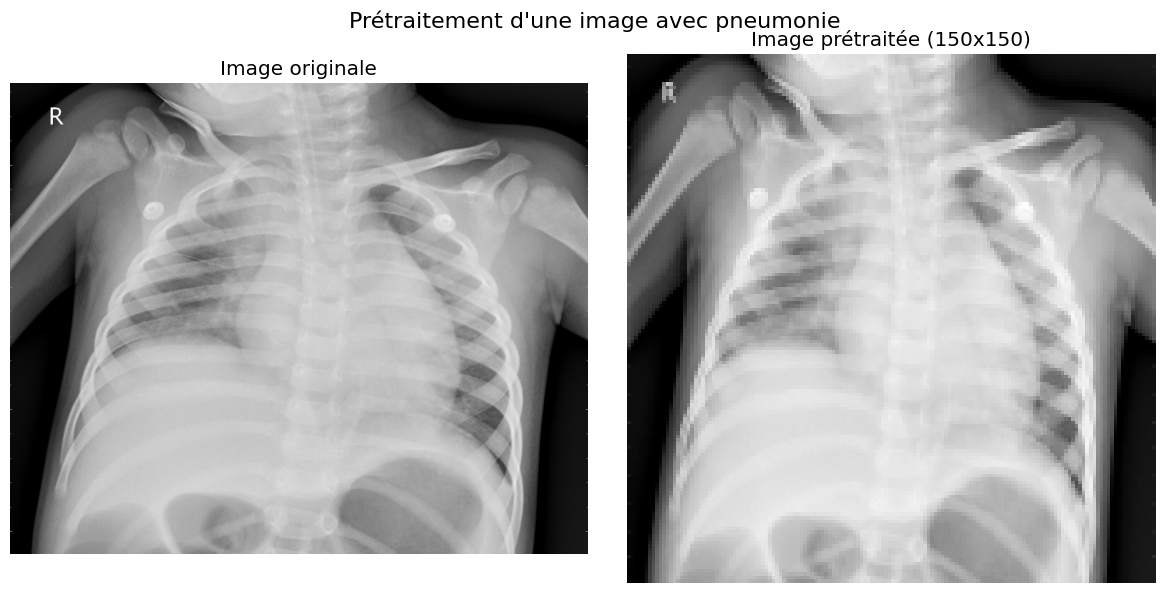

Forme de l'image prétraitée: (150, 150, 1)
Valeur minimale: 0.0
Valeur maximale: 0.9019607843137255
Valeur moyenne: 0.5706


In [6]:
# Charger et prétraiter l'image avec pneumonie
pneumonia_image_processed = preproc.charger_et_pretraiter_image(pneumonia_image_path, img_size)

# Afficher l'image originale et l'image prétraitée
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Image originale
original_img = cv2.imread(pneumonia_image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
ax1.imshow(original_img)
ax1.set_title("Image originale")
ax1.axis('off')

# Image prétraitée
ax2.imshow(np.squeeze(pneumonia_image_processed), cmap='gray')
ax2.set_title(f"Image prétraitée ({img_size[0]}x{img_size[1]})")
ax2.axis('off')

plt.suptitle("Prétraitement d'une image avec pneumonie", fontsize=16)
plt.tight_layout()
plt.show()

# Afficher la forme et les statistiques de l'image prétraitée
print(f"Forme de l'image prétraitée: {pneumonia_image_processed.shape}")
print(f"Valeur minimale: {pneumonia_image_processed.min()}")
print(f"Valeur maximale: {pneumonia_image_processed.max()}")
print(f"Valeur moyenne: {pneumonia_image_processed.mean():.4f}")

## 3. Test de l'augmentation de données

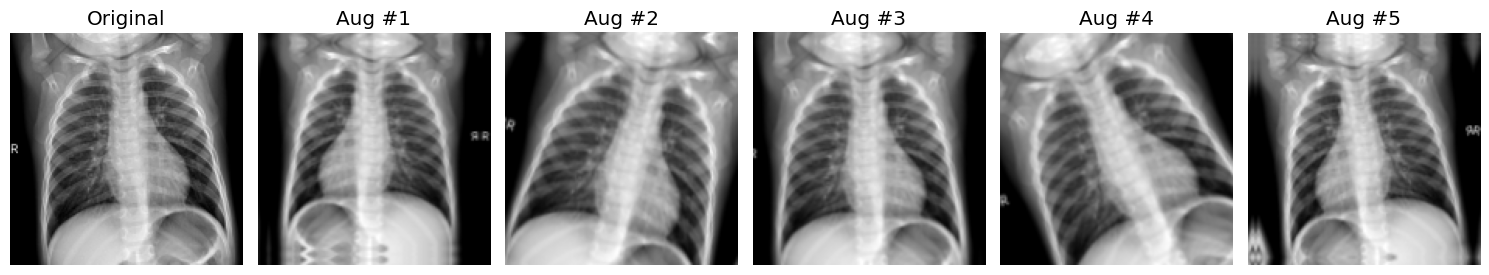

In [7]:
# Tester l'augmentation sur une image normale
preproc.afficher_exemples_augmentation(normal_image_processed, nb_exemples=5)

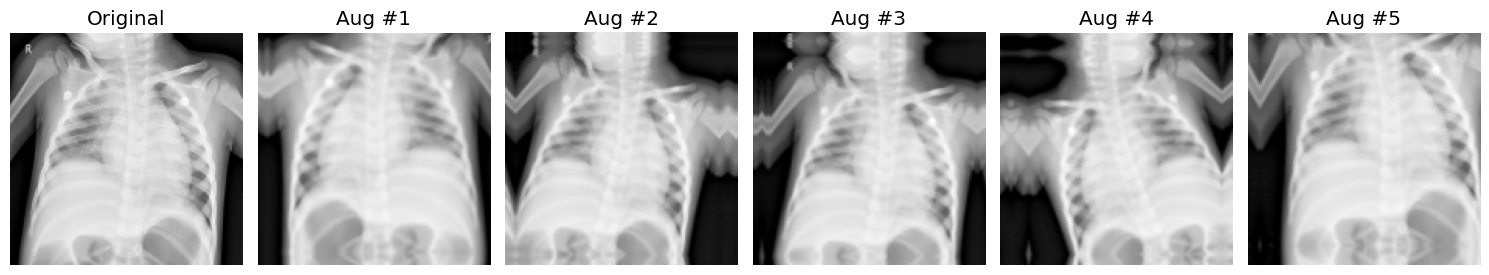

In [8]:
# Tester l'augmentation sur une image avec pneumonie
preproc.afficher_exemples_augmentation(pneumonia_image_processed, nb_exemples=5)

## 4. Chargement d'un lot d'images avec étiquettes

In [9]:
# Charger un petit lot d'images pour le test
X, y = preproc.charger_images_avec_etiquettes(train_normal_dir, train_pneumonia_dir, img_size, limite=10)

# Afficher les informations sur les données chargées
print(f"Forme de X: {X.shape}")
print(f"Forme de y: {y.shape}")
print(f"Nombre d'images normales: {np.sum(y == 0)}")
print(f"Nombre d'images avec pneumonie: {np.sum(y == 1)}")

Forme de X: (20, 150, 150, 1)
Forme de y: (20,)
Nombre d'images normales: 10
Nombre d'images avec pneumonie: 10


## 5. Création d'un batch avec augmentation

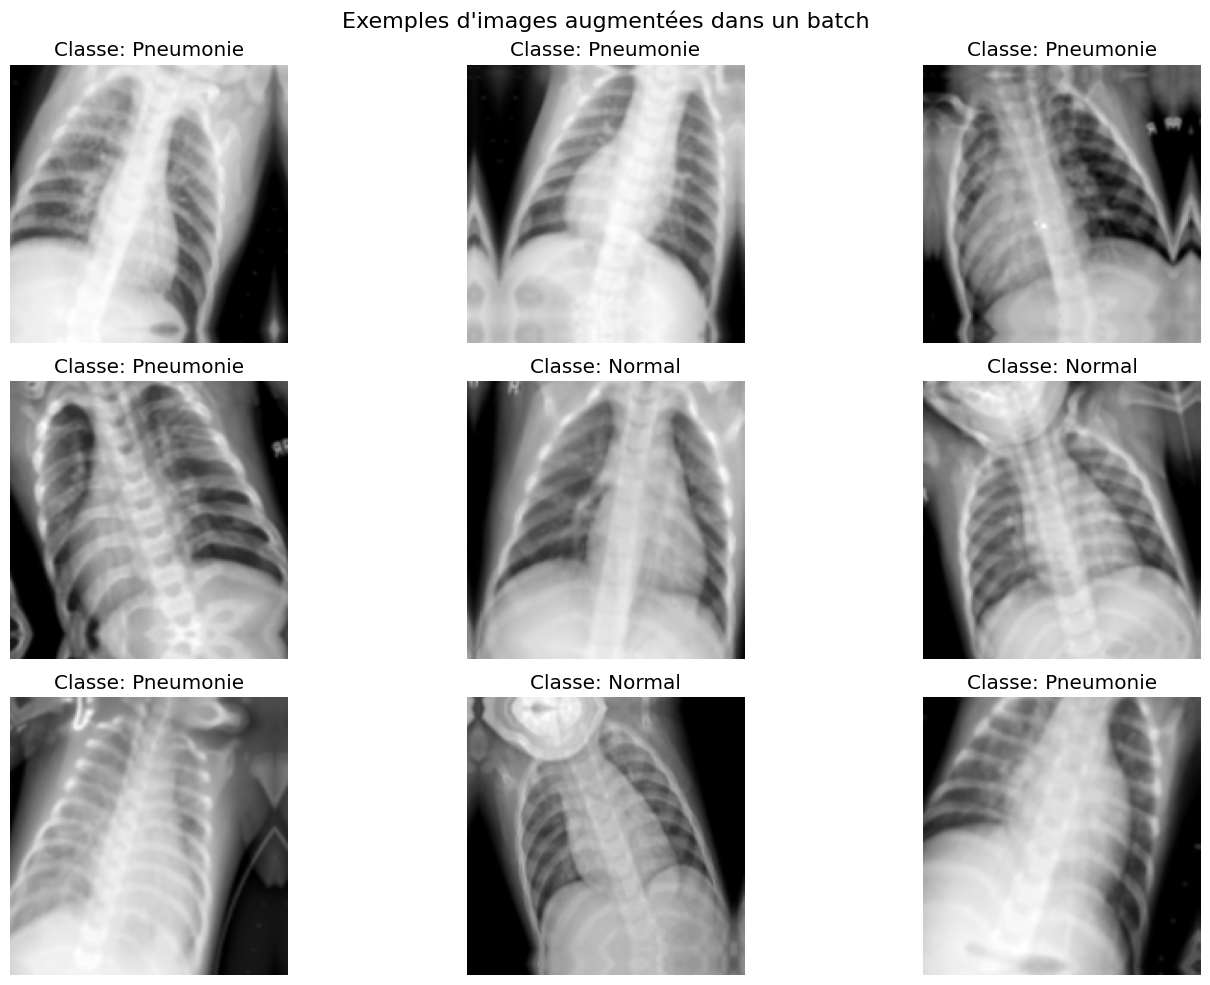

In [10]:
# Créer un batch avec augmentation
batch_size = 9
X_batch, y_batch = preproc.creer_batch_avec_augmentation(X, y, batch_size=batch_size, augmentation=True)

# Afficher les images du batch
plt.figure(figsize=(15, 10))
for i in range(batch_size):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.squeeze(X_batch[i]), cmap='gray')
    plt.title(f"Classe: {'Pneumonie' if y_batch[i] > 0.5 else 'Normal'}")
    plt.axis('off')
plt.suptitle("Exemples d'images augmentées dans un batch", fontsize=16)
plt.tight_layout()
plt.show()

## 6. Préparation des données pour le modèle

In [11]:
# Préparer les données pour le modèle (avec un petit échantillon pour le test)
# Note: Dans un cas réel, nous utiliserions toutes les données
X_train, y_train, X_val, y_val, X_test, y_test = preproc.preparer_donnees_pour_modele(
    train_dir, test_dir, img_size=img_size, batch_size=batch_size
)

# Afficher les informations sur les données préparées
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"\nDistribution des classes:")
print(f"Train - Normal: {np.sum(y_train == 0)}, Pneumonie: {np.sum(y_train == 1)}")
print(f"Validation - Normal: {np.sum(y_val == 0)}, Pneumonie: {np.sum(y_val == 1)}")
print(f"Test - Normal: {np.sum(y_test == 0)}, Pneumonie: {np.sum(y_test == 1)}")

Données d'entraînement chargées: 5216 images
  - Images normales: 1341
  - Images avec pneumonie: 3875

Répartition après division:
Ensemble d'entraînement: 3912 images
  - Images normales: 1006
  - Images avec pneumonie: 2906
Ensemble de validation: 1304 images
  - Images normales: 335
  - Images avec pneumonie: 969

Ensemble de test: 624 images
  - Images normales: 234
  - Images avec pneumonie: 390
X_train: (3912, 150, 150, 1), y_train: (3912,)
X_val: (1304, 150, 150, 1), y_val: (1304,)
X_test: (624, 150, 150, 1), y_test: (624,)

Distribution des classes:
Train - Normal: 1006, Pneumonie: 2906
Validation - Normal: 335, Pneumonie: 969
Test - Normal: 234, Pneumonie: 390


## 7. Conclusion

Dans ce notebook, nous avons testé les fonctions de prétraitement d'images de notre module `preprocess_images.py` modifié pour fonctionner sans TensorFlow. Nous avons vérifié que :

1. Les images sont correctement chargées et prétraitées (redimensionnement, normalisation, conversion en niveaux de gris)
2. L'augmentation de données fonctionne comme prévu, générant des variations des images originales en utilisant OpenCV
3. Nous pouvons charger des lots d'images avec leurs étiquettes et créer des batches avec augmentation
4. Les données sont correctement préparées pour l'entraînement, la validation et le test

Ces fonctions de prétraitement sont maintenant prêtes à être utilisées pour l'entraînement de notre modèle CNN.